# IMPORT

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import zipfile as z
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATA


In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

# DATA UNDERSTANDING

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size = 32
epochs = 100
IMG_HEIGHT = 100
IMG_WIDTH = 100

# VIS DATA

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

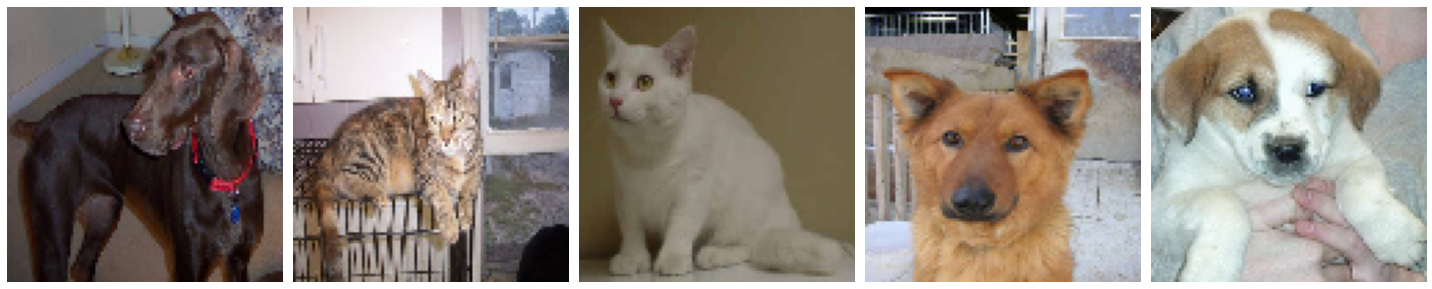

In [ ]:
plotImages(sample_training_images[:5])

# CONTOH AUGMENTASI

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Horizontal Flip

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=False,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

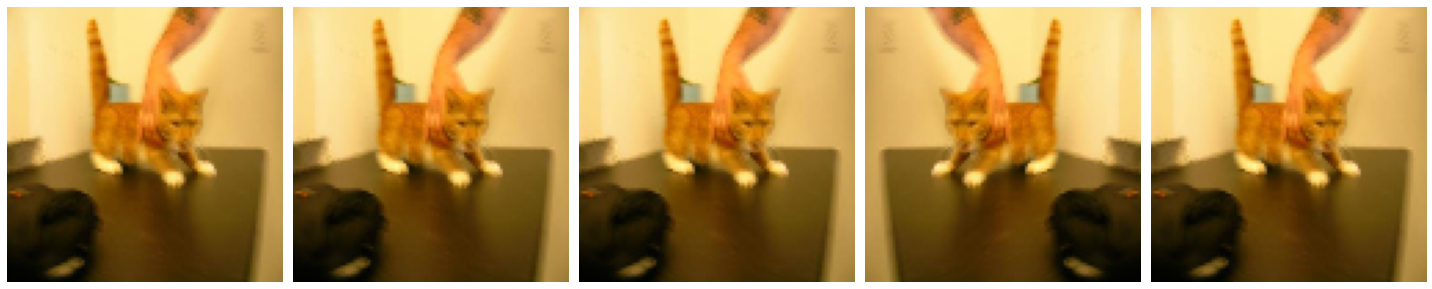

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

## Random Rotate

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=False,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


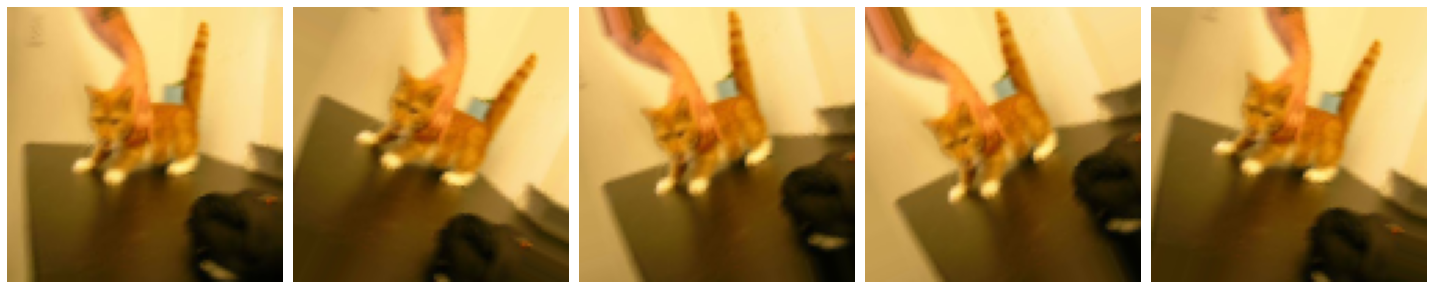

In [ ]:
plotImages(augmented_images)


## Zoom 

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=False,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


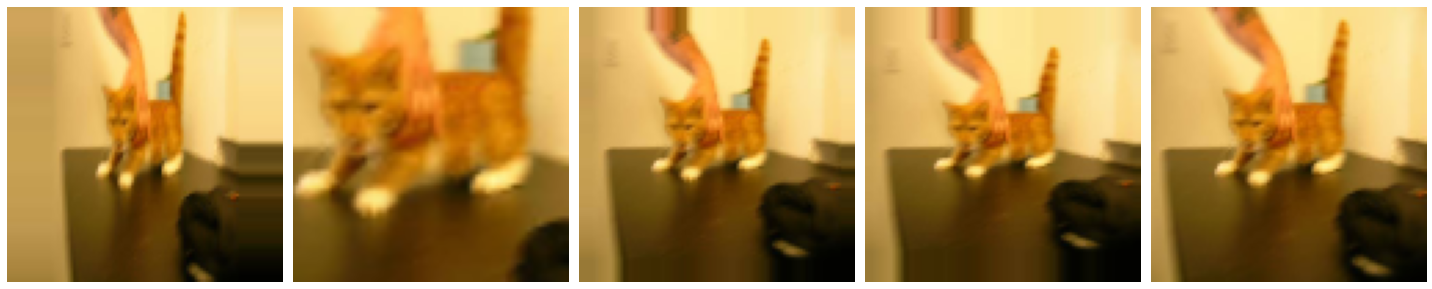

In [ ]:
plotImages(augmented_images)


# NON AUGMENTASI RGB + MODEL



## Augmentasi

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    )

In [ ]:
train = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     color_mode='rgb',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 color_mode='rgb',
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Model

In [ ]:
#Model
init = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=123)
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_initializer=init, padding="same", activation="relu",input_shape=(IMG_WIDTH, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.summary()
model.add(layers.Dense(128, kernel_initializer=init, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, kernel_initializer=init, activation="softmax"))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
          optimizer=keras.optimizers.Adam(learning_rate=0.001),
          metrics=['accuracy']
)
#Training
history = model.fit(train, epochs=100, 
                  batch_size=32,
                  validation_data=val, 
                  steps_per_epoch=int(2000/32),
                  callbacks = keras.callbacks.EarlyStopping(
                              monitor='accuracy', 
                              patience=3,
                              restore_best_weights=True)
)

Epoch 1/100
62/62 [==============================] - 43s 686ms/step - loss: 0.6996 - accuracy: 0.5325 - val_loss: 0.6895 - val_accuracy: 0.5380
Epoch 2/100
62/62 [==============================] - 42s 671ms/step - loss: 0.6775 - accuracy: 0.5625 - val_loss: 0.6648 - val_accuracy: 0.6670
Epoch 3/100
62/62 [==============================] - 42s 673ms/step - loss: 0.6457 - accuracy: 0.6255 - val_loss: 0.6486 - val_accuracy: 0.6110
Epoch 4/100
62/62 [==============================] - 41s 669ms/step - loss: 0.5908 - accuracy: 0.6875 - val_loss: 0.6108 - val_accuracy: 0.6690
Epoch 5/100
62/62 [==============================] - 42s 671ms/step - loss: 0.5421 - accuracy: 0.7271 - val_loss: 0.5836 - val_accuracy: 0.7010
Epoch 6/100
62/62 [==============================] - 42s 671ms/step - loss: 0.4847 - accuracy: 0.7571 - val_loss: 0.5780 - val_accuracy: 0.7020
Epoch 7/100
62/62 [==============================] - 42s 675ms/step - loss: 0.4315 - accuracy: 0.8018 - val_loss: 0.5826 - val_accuracy:

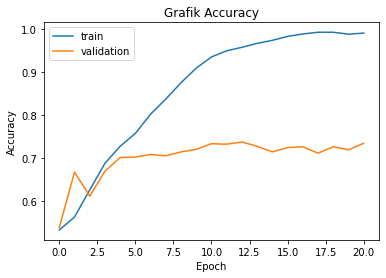

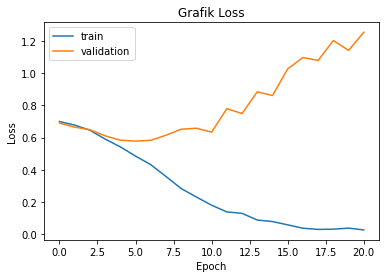

In [ ]:
#Grafik
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/nonaugrgb.h5')

# AUGMENTASI RGB + MODEL



## Augmentasi

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    zoom_range = 0.5,
                    rotation_range=10,
                    horizontal_flip=True
                    )

In [ ]:
train = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                      color_mode='rgb',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 color_mode='rgb',
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Model

In [ ]:
#Model
init = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=123)
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_initializer=init, padding="same", activation="relu",input_shape=(IMG_WIDTH, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.summary()
model.add(layers.Dense(128, kernel_initializer=init, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, kernel_initializer=init, activation="softmax"))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)            

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
          optimizer=keras.optimizers.Adam(learning_rate=0.001),
          metrics=['accuracy']
)
#Training
history = model.fit(train, epochs=100, 
                  batch_size=32,
                  validation_data=val, 
                  steps_per_epoch=int(2000/32),
                  callbacks = keras.callbacks.EarlyStopping(
                              monitor='accuracy', 
                              patience=3,
                              restore_best_weights=True)
)

Epoch 1/100
62/62 [==============================] - 47s 753ms/step - loss: 0.6987 - accuracy: 0.5218 - val_loss: 0.6906 - val_accuracy: 0.5230
Epoch 2/100
62/62 [==============================] - 47s 765ms/step - loss: 0.6737 - accuracy: 0.5650 - val_loss: 0.6628 - val_accuracy: 0.6230
Epoch 3/100
62/62 [==============================] - 46s 748ms/step - loss: 0.6532 - accuracy: 0.6204 - val_loss: 0.6322 - val_accuracy: 0.6420
Epoch 4/100
62/62 [==============================] - 46s 747ms/step - loss: 0.6254 - accuracy: 0.6535 - val_loss: 0.6324 - val_accuracy: 0.6300
Epoch 5/100
62/62 [==============================] - 46s 747ms/step - loss: 0.6238 - accuracy: 0.6489 - val_loss: 0.6365 - val_accuracy: 0.6430
Epoch 6/100
62/62 [==============================] - 47s 751ms/step - loss: 0.6100 - accuracy: 0.6704 - val_loss: 0.6206 - val_accuracy: 0.6440
Epoch 7/100
62/62 [==============================] - 46s 742ms/step - loss: 0.5794 - accuracy: 0.6885 - val_loss: 0.5999 - val_accuracy:

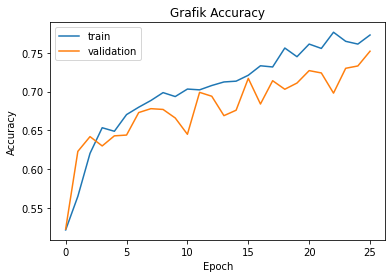

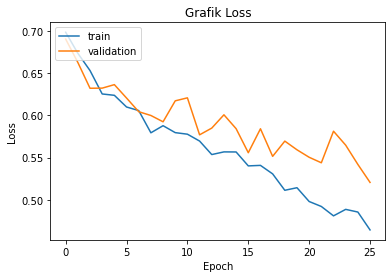

In [ ]:
#Grafik
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/augrgb.h5')

# NON AUGMENTASI GRAYSCALE + MODEL



## Augmentasi

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    )

In [ ]:
train = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                      color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 color_mode='grayscale',
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Model

In [ ]:
#Model
init = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=123)
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_initializer=init, padding="same", activation="relu",input_shape=(IMG_WIDTH, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.summary()
model.add(layers.Dense(128, kernel_initializer=init, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, kernel_initializer=init, activation="softmax"))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
          optimizer=keras.optimizers.Adam(learning_rate=0.001),
          metrics=['accuracy']
)
#Training
history = model.fit(train, epochs=100, 
                  batch_size=32,
                  validation_data=val, 
                  steps_per_epoch=int(2000/32),
                  callbacks = keras.callbacks.EarlyStopping(
                              monitor='accuracy', 
                              patience=3,
                              restore_best_weights=True)
)

Epoch 1/100
62/62 [==============================] - 38s 596ms/step - loss: 0.6984 - accuracy: 0.5025 - val_loss: 0.6922 - val_accuracy: 0.5130
Epoch 2/100
62/62 [==============================] - 36s 588ms/step - loss: 0.6873 - accuracy: 0.5493 - val_loss: 0.6738 - val_accuracy: 0.6290
Epoch 3/100
62/62 [==============================] - 36s 581ms/step - loss: 0.6722 - accuracy: 0.5849 - val_loss: 0.6465 - val_accuracy: 0.6640
Epoch 4/100
62/62 [==============================] - 36s 582ms/step - loss: 0.6084 - accuracy: 0.6819 - val_loss: 0.6290 - val_accuracy: 0.6570
Epoch 5/100
62/62 [==============================] - 36s 582ms/step - loss: 0.4464 - accuracy: 0.7973 - val_loss: 0.5757 - val_accuracy: 0.7070
Epoch 7/100
62/62 [==============================] - 36s 584ms/step - loss: 0.3527 - accuracy: 0.8496 - val_loss: 0.6203 - val_accuracy: 0.6970
Epoch 8/100
62/62 [==============================] - 36s 586ms/step - loss: 0.2646 - accuracy: 0.8968 - val_loss: 0.6382 - val_accuracy:

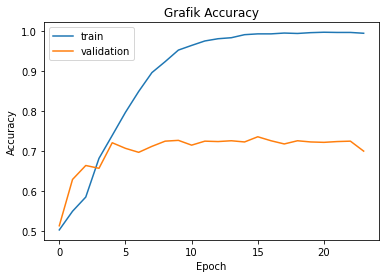

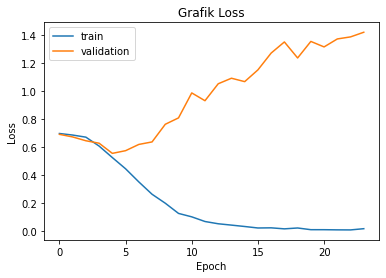

In [ ]:
#Grafik
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/nonauggray.h5')

# AUGMENTASI GRAYSCALE + MODEL



## Augmentasi

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    zoom_range = 0.5,
                    rotation_range=10,
                    horizontal_flip=True
                    )

In [ ]:
train = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                      color_mode='grayscale',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 color_mode='grayscale',
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Model

In [ ]:
#Model
init = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=123)
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_initializer=init, padding="same", activation="relu",input_shape=(IMG_WIDTH, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer=init, padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.summary()
model.add(layers.Dense(128, kernel_initializer=init, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, kernel_initializer=init, activation="softmax"))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
          optimizer=keras.optimizers.Adam(learning_rate=0.001),
          metrics=['accuracy']
)
#Training
history = model.fit(train, epochs=100, 
                  batch_size=32,
                  validation_data=val, 
                  steps_per_epoch=int(2000/32),
                  callbacks = keras.callbacks.EarlyStopping(
                              monitor='accuracy', 
                              patience=3,
                              restore_best_weights=True)
)

Epoch 1/100
62/62 [==============================] - 42s 668ms/step - loss: 0.7057 - accuracy: 0.5005 - val_loss: 0.6929 - val_accuracy: 0.5510
Epoch 2/100
62/62 [==============================] - 41s 660ms/step - loss: 0.6929 - accuracy: 0.5127 - val_loss: 0.6901 - val_accuracy: 0.5680
Epoch 3/100
62/62 [==============================] - 41s 654ms/step - loss: 0.6892 - accuracy: 0.5498 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 4/100
62/62 [==============================] - 41s 653ms/step - loss: 0.6858 - accuracy: 0.5447 - val_loss: 0.6809 - val_accuracy: 0.6130
Epoch 5/100
62/62 [==============================] - 41s 653ms/step - loss: 0.6767 - accuracy: 0.5691 - val_loss: 0.6655 - val_accuracy: 0.6140
Epoch 6/100
62/62 [==============================] - 40s 652ms/step - loss: 0.6651 - accuracy: 0.5945 - val_loss: 0.6459 - val_accuracy: 0.6210
Epoch 7/100
62/62 [==============================] - 41s 653ms/step - loss: 0.6505 - accuracy: 0.6265 - val_loss: 0.6457 - val_accuracy:

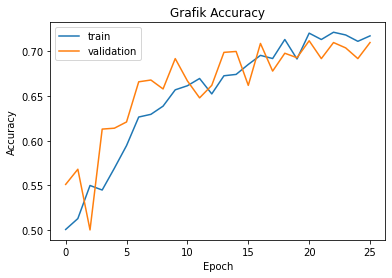

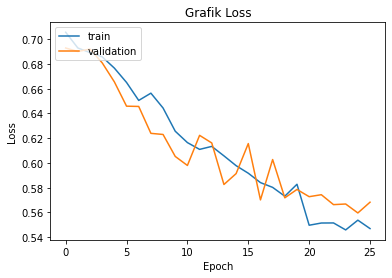

In [ ]:
#Grafik
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/auggray.h5')

# PREDICT

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Kaggle/augrgb.h5')

Saving image_2021-07-31_125609.png to image_2021-07-31_125609.png
cat


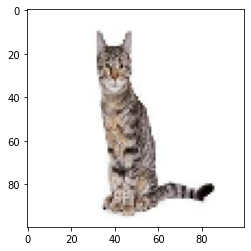

In [ ]:
from keras.preprocessing.image import load_img
from google.colab import files
from keras.preprocessing import image

#Upload
upload = files.upload()
#Predict
for i in upload.keys():
  nama = i
  img = image.load_img(nama, target_size=(IMG_HEIGHT,IMG_HEIGHT))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)	  
  images = np.vstack([x])
  kelas = model.predict(images, batch_size=32)

if kelas[0,1] == 1:
  print('cat')
else:
  print('dog')